In [70]:
import numpy as np
import matplotlib.pylab as pylab
import imageio
import pandas as pd
%matplotlib inline

In [76]:
videoFile = './data/driving.avi'
vid = imageio.get_reader(videoFile,  'ffmpeg')

dataFile = './data/actions.csv'
df = pd.read_csv(dataFile, delimiter='\t')

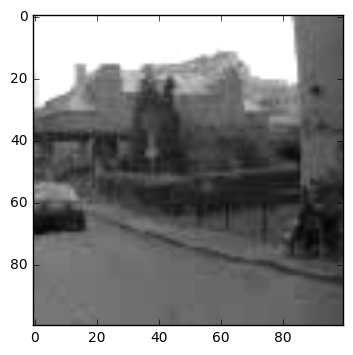

In [84]:
for index, row in df.iterrows():
    if row['Frame'] == 40000:
        frame = row['Frame']
        gaze_x = row['GazeX']
        gaze_y = row['GazeY']

        image = vid.get_data(frame)
        fig = pylab.figure()
        pylab.imshow(image)
    
this_glimpse = glimpse(image, gaze_x, gaze_y)
pylab.imshow(this_glimpse)

pylab.show()

In [83]:
def glimpse(image, x, y, stride=50):
    """Returns a subsection (glimpse) of the image centered on the given point."""
    x = int(x)  # Force to int
    y = int(y)  # Force to int
    min_x = x - stride
    max_x = x + stride
    
    min_y = y - stride
    max_y = y + stride
    image_glimpse = image[min_y:max_y, min_x:max_x, :]  # NOTE: row, column, RGB
    return image_glimpse